Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the Dataset

In [2]:
df=pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Exploratory Data Analysis(EDA)

In [3]:
df.shape

(158, 12)

The dataset contains 158 rows and 12 columns

In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

The column names is given above.

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

We have 1 int64 type data, 9 float64 type data and 2 object type data in the dataset.

In [6]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [7]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [8]:
print(df['Region'].nunique())

10


In [9]:
print(df['Country'].nunique())

158


As we can see above the column Country is not useful in predicting the Hapiness score. The column Happiness Rank will also be collinear to the Happiness score. We can remove these columns. We may loose over 15% of the data. But since these columns dont serve much of the important purpose. we can remove them.  

In [10]:
#checking the nunique values in all columns
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

<AxesSubplot:>

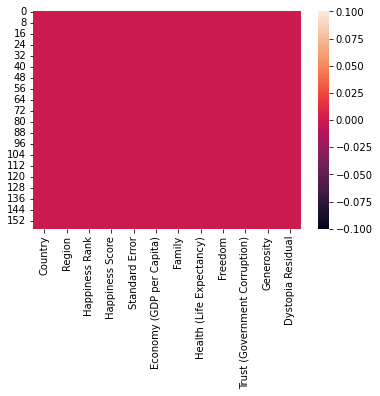

In [11]:
#checking for null values through heatmap and info function
df.info()

sns.heatmap(df.isnull())

As we see above there are no null values in the dataset.

In [12]:
df.drop(['Country'],axis=1, inplace=True)
#dropping only country column but not Happiness Rank column so as to check the collinearity and then drop

In [13]:
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [14]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations
1. The Mean and Median(50%) is alomost same for all columns except for Standard error, Economy, Health and Trust.
2. The 75% and Max values does not differ much. The outliers present in each columns is very low.

# Data Visualization

#### Bivariate Analysis

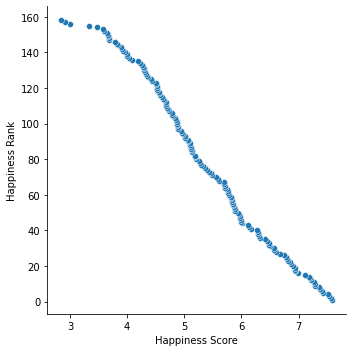

In [15]:
sns.relplot(x='Happiness Score',y='Happiness Rank',data=df)

As we can see above the Happiness Score is negatively related to Happiness Rank. We can drop this so as to make our model learn the other columns to predict the happiness score accurately.

In [16]:
df.drop(['Happiness Rank'],axis=1, inplace=True)

In [17]:
df.shape

(158, 10)

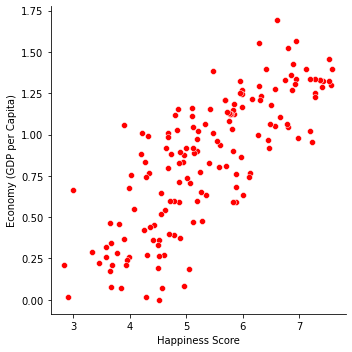

In [18]:
sns.relplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df, color='r')

The Happiness Score is postively related to Economy GDP as seen above.

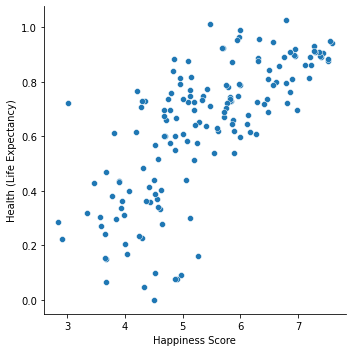

In [19]:
sns.relplot(x='Happiness Score',y='Health (Life Expectancy)',data=df)

Similar to Economy GDP, the Health is also positively related to Hapiness Score.

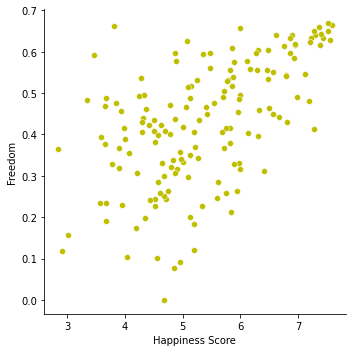

In [20]:
sns.relplot(x='Happiness Score',y='Freedom',data=df,color='y')

The Freedom is also postively related to Happiness Score

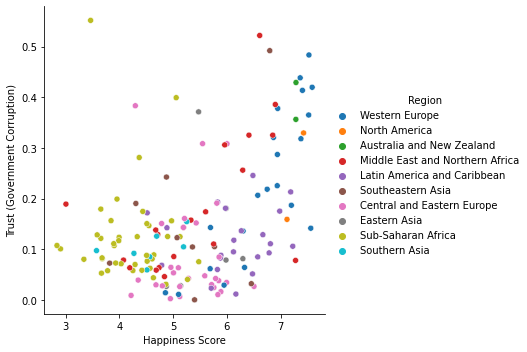

In [21]:
sns.relplot(x='Happiness Score',y='Trust (Government Corruption)',data=df, color='g',hue='Region')

There is positive relation of happiness score and Trust. But it is not highly correlated.

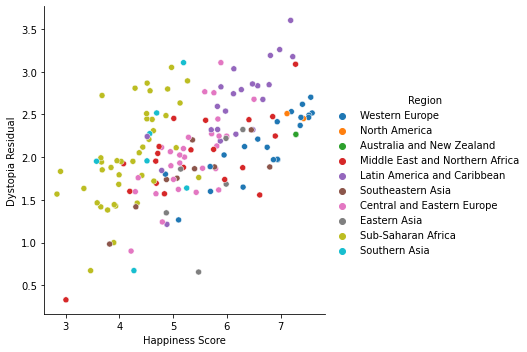

In [22]:
sns.relplot(x='Happiness Score',y='Dystopia Residual',data=df,hue='Region')

Dystopia Residual is positively related to Happiness score.

In [23]:
region_GDP=df.groupby('Region')['Economy (GDP per Capita)'].sum()
print(region_GDP)

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64


Text(0, 0.5, '')

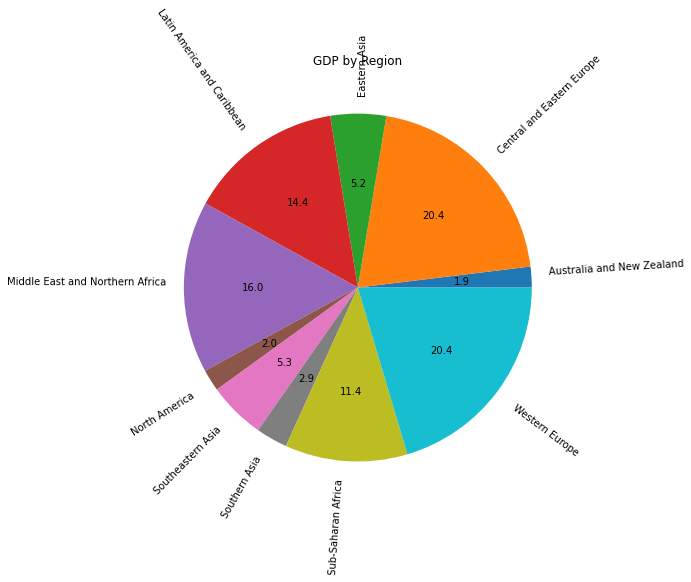

In [24]:
plt.figure(figsize=(8,8))
region_GDP.plot.pie(autopct='%.1f',rotatelabels=True)
plt.title('GDP by Region')
plt.ylabel('')

By the above pie plot we can see Region wise GDP.
The Central and Eastern Europe and Western Europe countries are contributing the highest GDP. Whereas North America and Southern Asia the lowest.

In [25]:
region_health=df.groupby('Region')['Health (Life Expectancy)'].sum()
print(region_health)

Region
Australia and New Zealand           1.83993
Central and Eastern Europe         20.84444
Eastern Asia                        5.26433
Latin America and Caribbean        15.48515
Middle East and Northern Africa    14.11231
North America                       1.76742
Southeastern Asia                   6.09621
Southern Asia                       3.78581
Sub-Saharan Africa                 11.29327
Western Europe                     19.09211
Name: Health (Life Expectancy), dtype: float64


Text(0, 0.5, '')

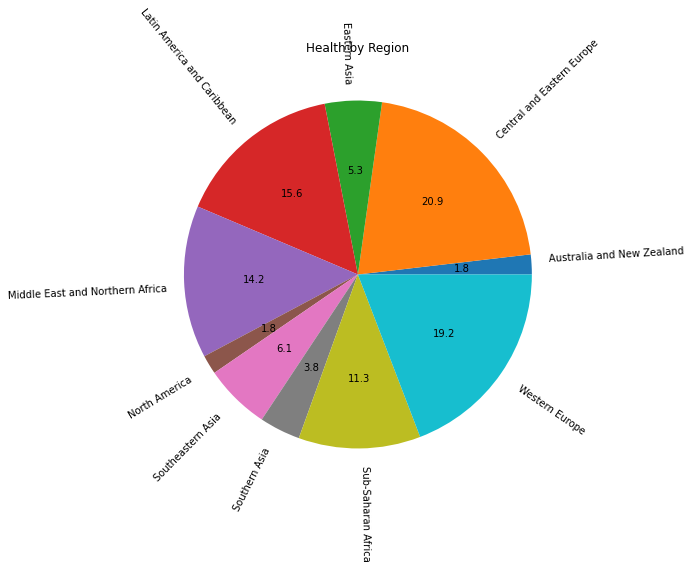

In [26]:
plt.figure(figsize=(8,8))
region_health.plot.pie(autopct='%.1f',rotatelabels=True)
plt.title('Health by Region')
plt.ylabel('')

The Central and Eastern Europe and Western Europe countries have the best health compared to other regions.

<AxesSubplot:xlabel='Region', ylabel='Trust (Government Corruption)'>

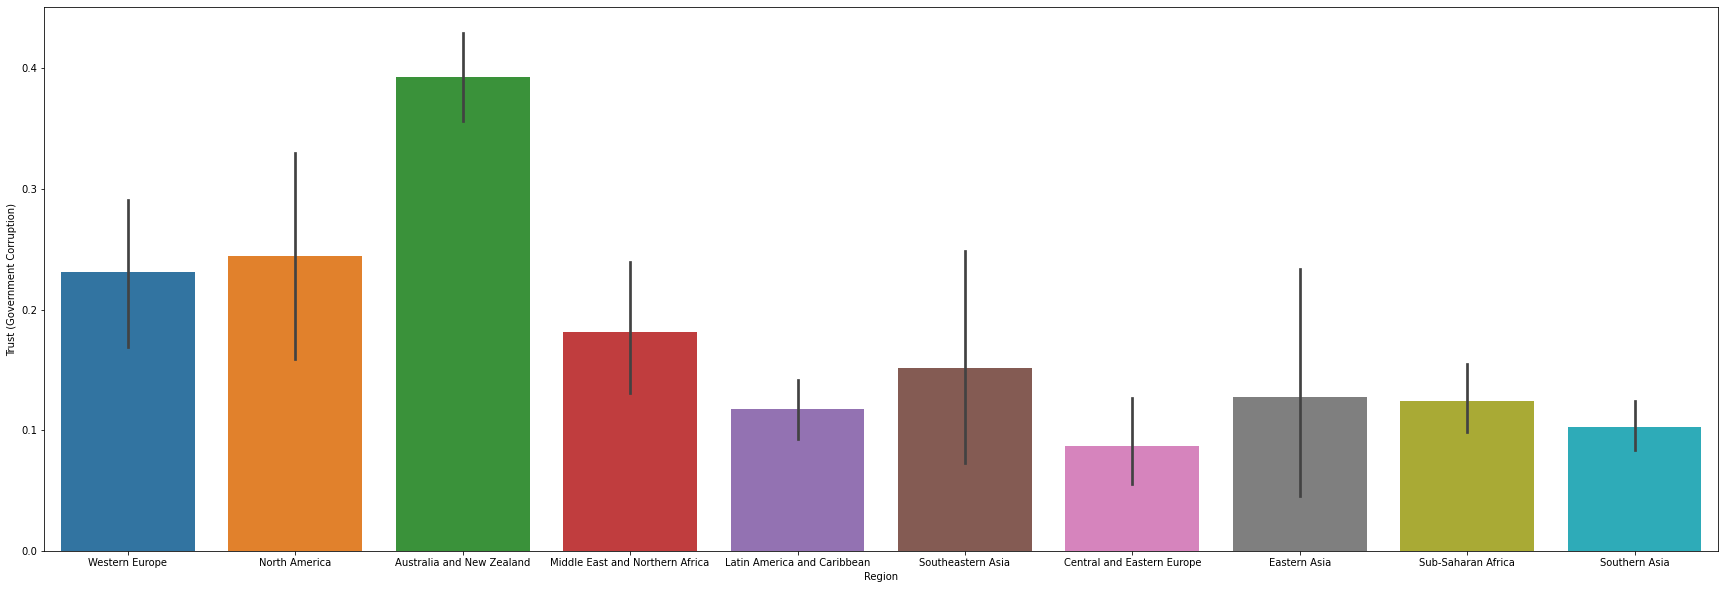

In [27]:
plt.figure(figsize=(30,10))
sns.barplot(x=df['Region'] , y=df['Trust (Government Corruption)'], data=df)

As per the above graph the highest corruption is in Australia and New Zealand Region. The lowest corruption is in Central and Eastern Europe region.

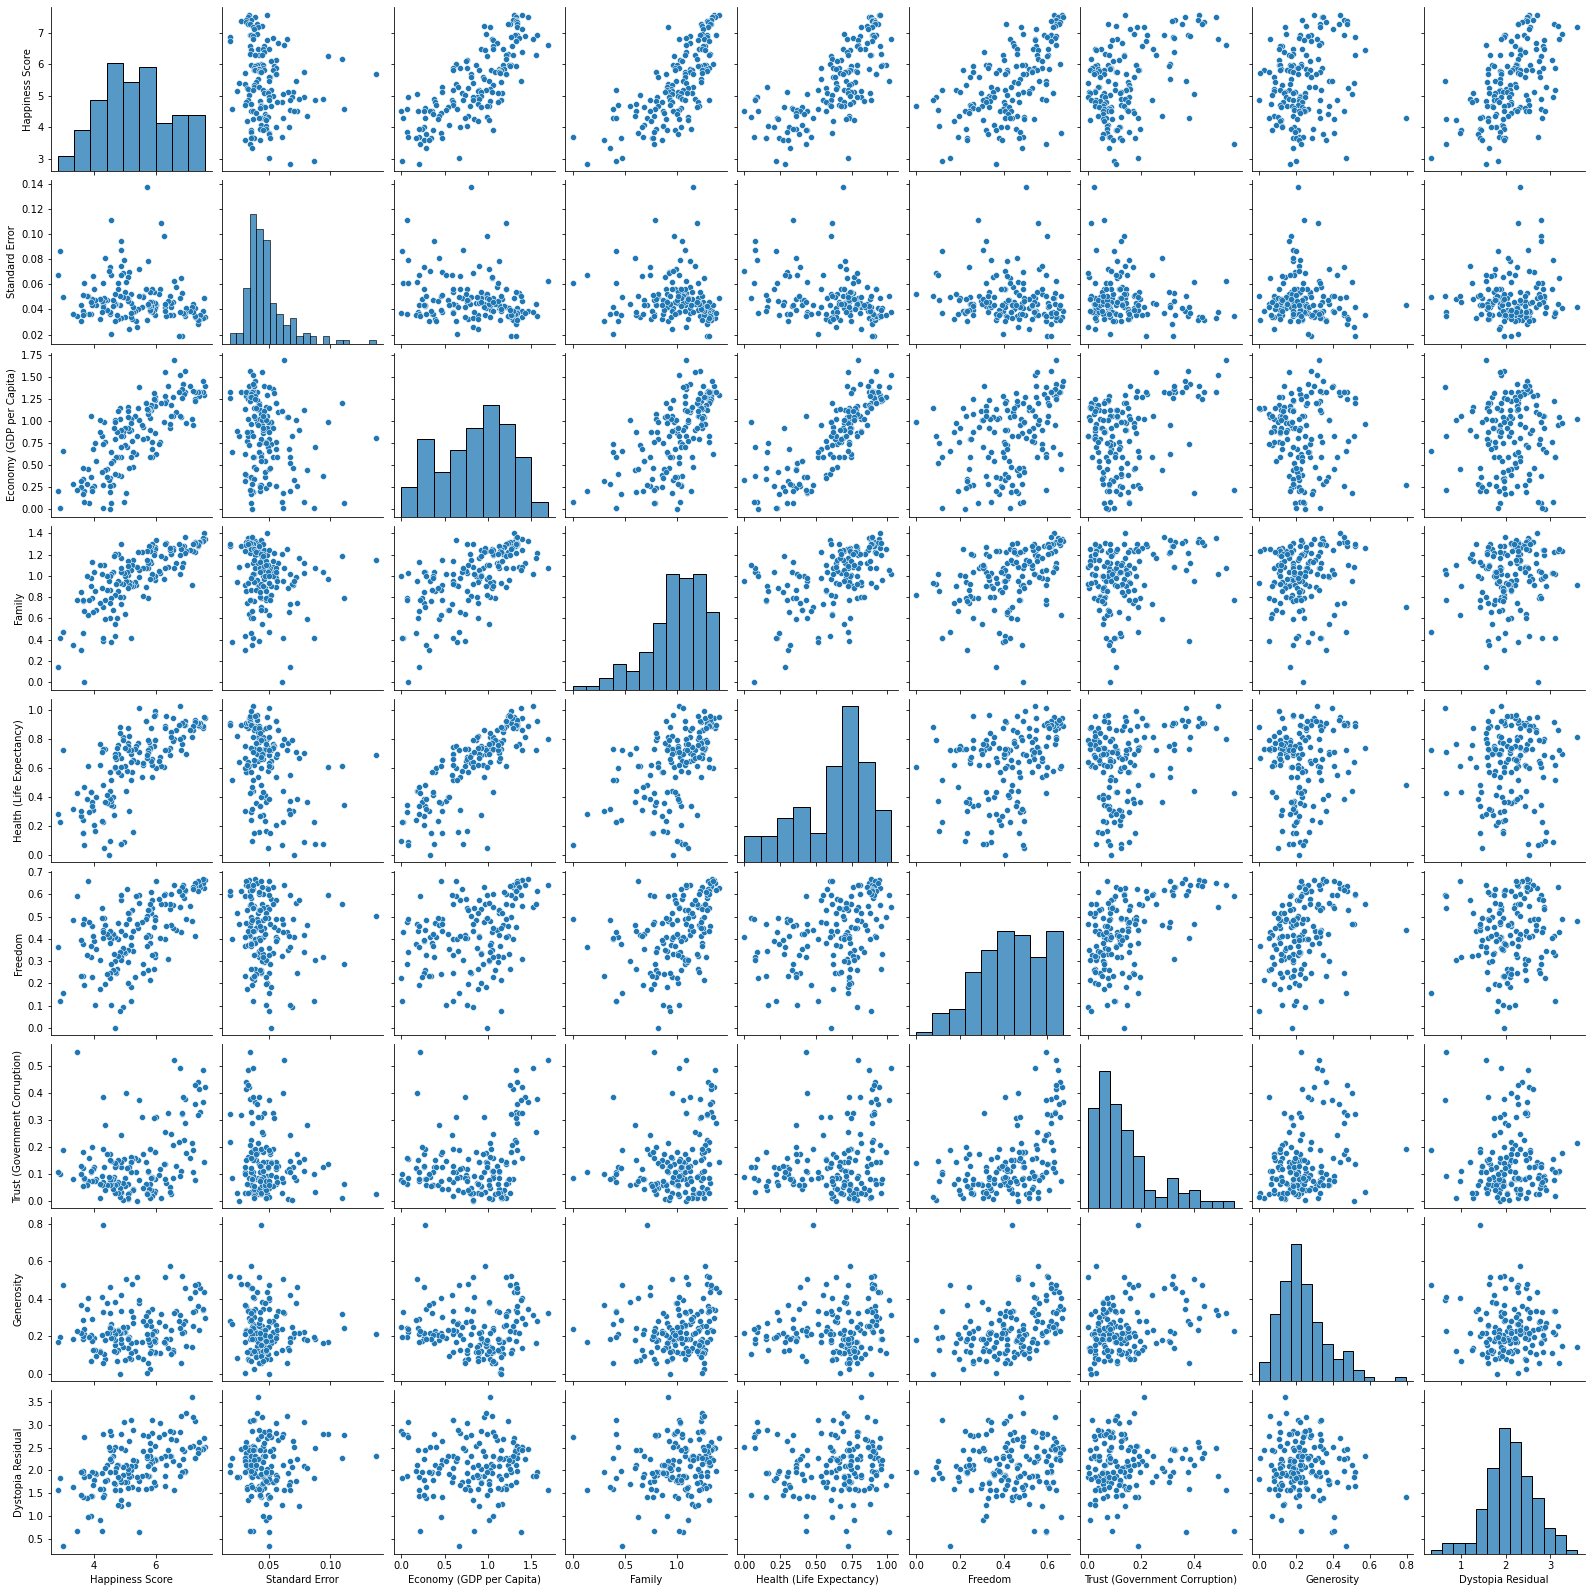

In [28]:
sns.pairplot(df)
plt.show()

#### Encoding The categorical data to numerical

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Region']=le.fit_transform(df['Region'])
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Checking For outliers

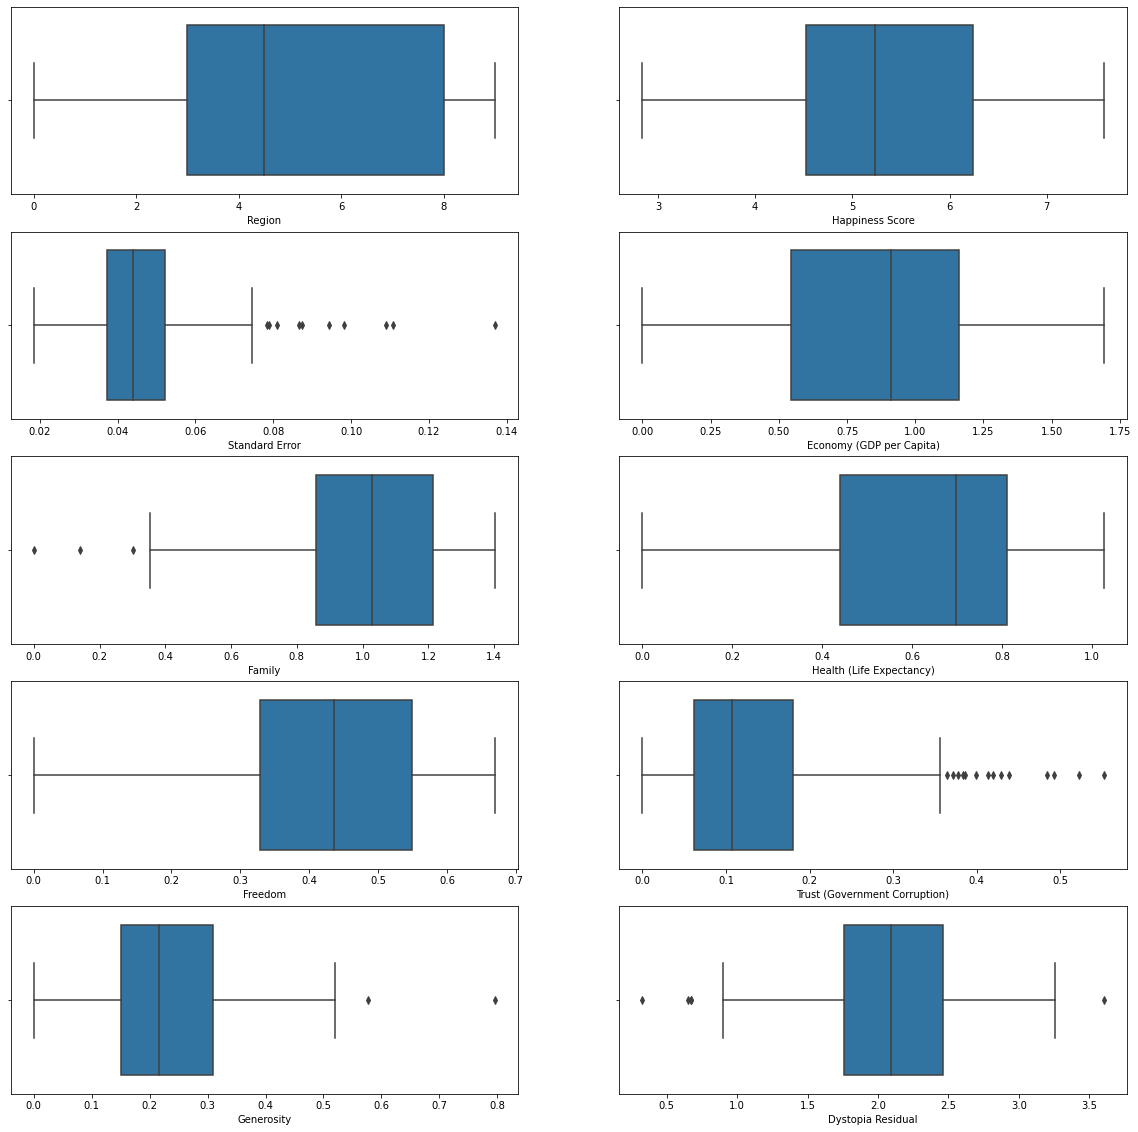

In [30]:
plt.figure(figsize=(20,20))
for i in enumerate(df.columns):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(df[i[1]])

As per the above graph we can see that there are some outliers in standard error, family, Trust, Generosity and Dystopia Residual.

### Removing Outliers

Zscore method

In [31]:
#Splitting the data to remove outliers
x= df.drop(['Happiness Score'], axis=1)
y= df['Happiness Score']
x.shape

(158, 9)

In [32]:
y.shape

(158,)

In [33]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.300256,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.300256,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,1.300256,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.300256,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,0.040302,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...
153,0.965117,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,0.965117,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,0.375441,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,0.965117,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [34]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [35]:
z.iloc[27][6]

3.1646194851713774

In [36]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(158, 10)
(149, 10)


In [37]:
# Data loss percentage using zscore method
a=((158-149)/158)*100
a

5.69620253164557

IQR Method

In [38]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR=Q3-Q1
df2=x[~((x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(126, 9)

In [39]:
# Data loss percentage using IQR method
b=((158-126)/158)*100
b

20.253164556962027

The Data loss percentage is 5.69% using zscore and 20.25% using IQR. Only 10% of data loss is acceptable. Hence i am selecting zscore method

In [40]:
df=df1
df

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,8,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,8,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,7,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [41]:
df.reset_index(drop=True,inplace=True)
df.head(5)

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Checking for skewness

In [42]:
df.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

The standard error and Trust have some skewness, lets check it out.

Before removing skewness:-


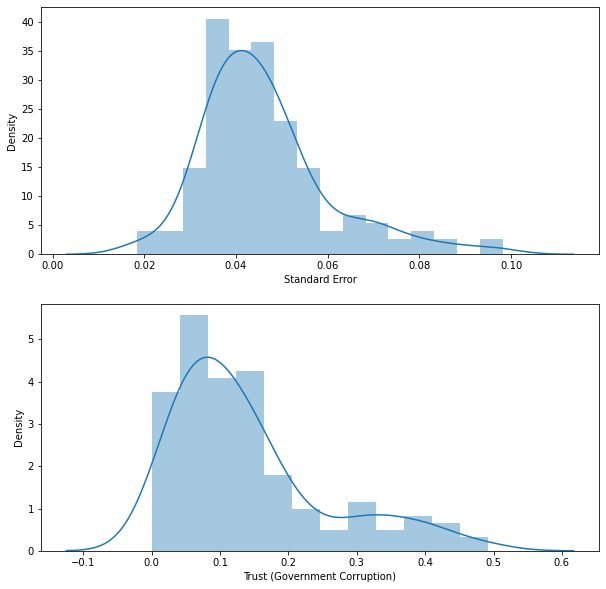

In [43]:
skewed=['Standard Error', 'Trust (Government Corruption)']
print('Before removing skewness:-')
plt.figure(figsize=(10,10))
for i in enumerate(skewed):
    plt.subplot(2,1,i[0]+1)
    sns.distplot(df[i[1]])
plt.show()

Removing Skewness

After removing skewness:-


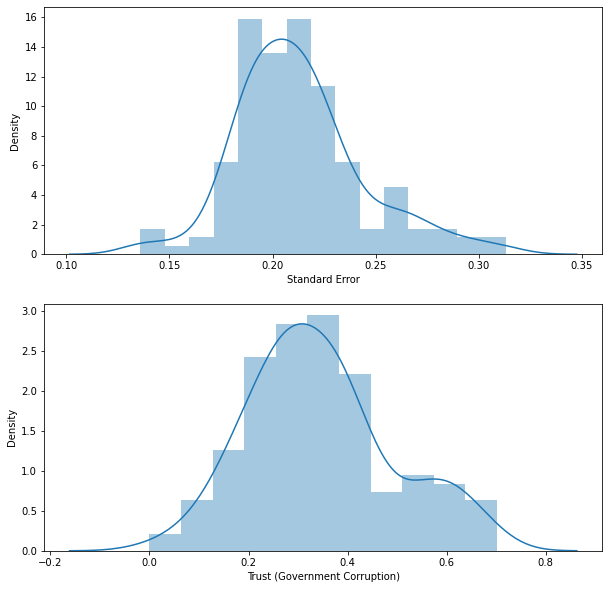

In [44]:
df['Standard Error']=np.sqrt(df['Standard Error'])
df['Trust (Government Corruption)']=np.sqrt(df['Trust (Government Corruption)'])
print('After removing skewness:-')
plt.figure(figsize=(10,10))
for i in enumerate(skewed):
    plt.subplot(2,1,i[0]+1)
    sns.distplot(df[i[1]])
plt.show()

In [45]:
df.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   0.717347
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    0.437253
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

As we can see we have reduced the skewness in Standard Error and Trust

## Correlation between variables

In [46]:
dfcor=df.corr()
dfcor

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,-0.145850,-0.039047,-0.224928,-0.127749,-0.334531,0.101335,0.202791,0.305791,-0.059494
Happiness Score,-0.145850,1.000000,-0.236068,0.773577,0.720868,0.729191,0.585066,0.427308,0.250903,0.528334
Standard Error,-0.039047,-0.236068,1.000000,-0.247136,-0.131884,-0.347264,-0.198629,-0.113976,-0.149313,0.032865
Economy (GDP per Capita),-0.224928,0.773577,-0.247136,1.000000,0.628589,0.817470,0.376780,0.268712,0.020730,0.026936
Family,-0.127749,0.720868,-0.131884,0.628589,1.000000,0.503890,0.474229,0.208438,0.154011,0.118062
Health (Life Expectancy),-0.334531,0.729191,-0.347264,0.817470,0.503890,1.000000,0.382595,0.195345,0.129328,0.031212
Freedom,0.101335,0.585066,-0.198629,0.376780,0.474229,0.382595,1.000000,0.498882,0.428718,0.058596
Trust (Government Corruption),0.202791,0.427308,-0.113976,0.268712,0.208438,0.195345,0.498882,1.000000,0.268562,0.099828
Generosity,0.305791,0.250903,-0.149313,0.020730,0.154011,0.129328,0.428718,0.268562,1.000000,-0.034239
Dystopia Residual,-0.059494,0.528334,0.032865,0.026936,0.118062,0.031212,0.058596,0.099828,-0.034239,1.000000


<AxesSubplot:>

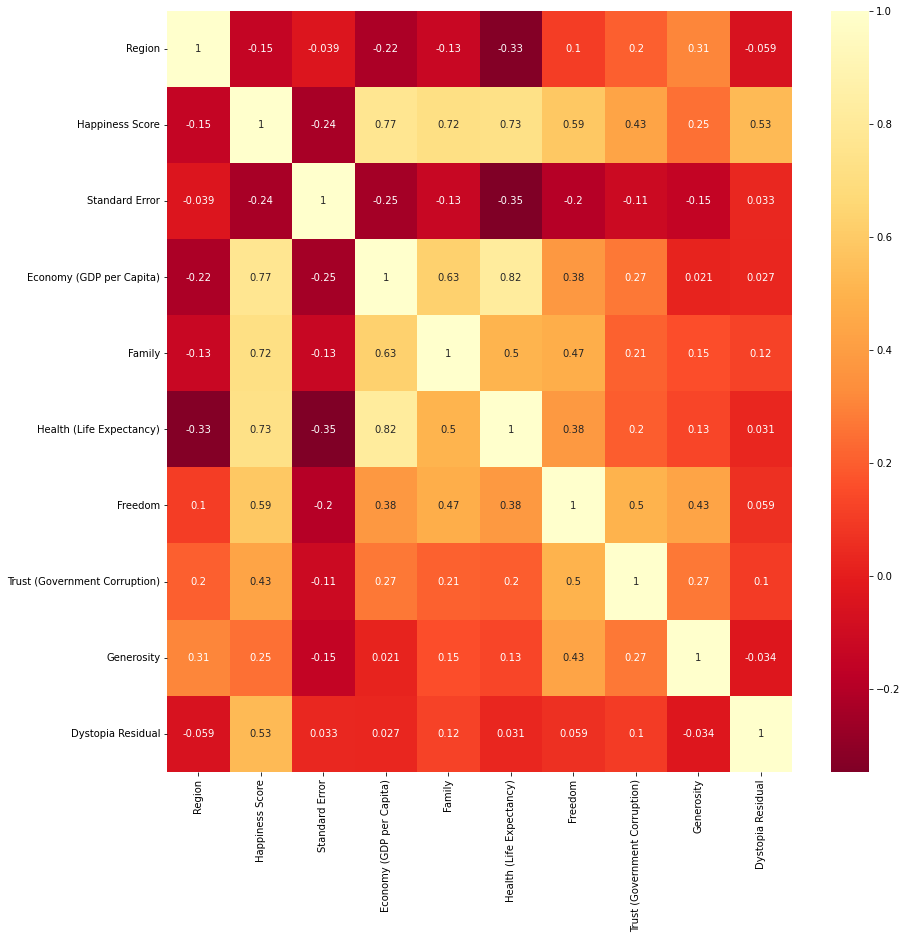

In [47]:
plt.figure(figsize=(14,14))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

Observations:
1. The Economy, Family and Health are quite highly correlated to the Happiness Score.
2. The Freedom, Trust and Dystopia Residual are moderately correlated to Happiness Score.
3. The Economy and Health are highly correlated to each other.
4. The Standard error is negatively less correlated to happiness score.

## Checking Multicolinearity

In [48]:
#Splitting the data
x= df.drop(['Happiness Score'], axis=1)
y= df['Happiness Score']

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["faetures"]=x.columns
    print(vif)

In [50]:
vif_calc()

   VIF Factor                       faetures
0    4.871265                         Region
1   19.790186                 Standard Error
2   24.471453       Economy (GDP per Capita)
3   31.941916                         Family
4   26.238453       Health (Life Expectancy)
5   17.466800                        Freedom
6    9.610225  Trust (Government Corruption)
7    6.941335                     Generosity
8   16.388854              Dystopia Residual


As we can see the values are not so high so we do not have to remove any data.

### Feature Scaling using Standard Scaler

In [51]:
from sklearn.preprocessing import MinMaxScaler
st=MinMaxScaler()
x=pd.DataFrame(st.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8
0,1.000000,0.274970,0.892961,0.952046,0.918244,0.993789,0.923601,0.514975,0.632017
1,1.000000,0.479776,0.832733,1.000000,0.924496,0.938841,0.536136,0.757071,0.694649
2,1.000000,0.262217,0.847542,0.962115,0.853099,0.969615,0.991295,0.592382,0.623420
3,1.000000,0.344284,0.932918,0.935163,0.863409,1.000000,0.861267,0.602100,0.614353
4,0.555556,0.296433,0.848060,0.927577,0.883326,0.945112,0.818365,0.794916,0.609756
...,...,...,...,...,...,...,...,...,...
144,0.888889,0.512153,0.297549,0.425967,0.148110,0.699775,0.603485,0.349905,0.258812
145,0.888889,0.406134,0.165048,0.499400,0.264570,0.589685,0.510647,0.377356,0.274997
146,0.777778,0.223777,0.204500,0.000000,0.295879,0.349604,0.444410,0.633524,0.440256
147,0.888889,0.311734,0.183291,0.046399,0.311241,0.723426,0.403450,0.316849,0.332103


In [52]:
x.columns=['Region','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
x.head()

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.000000,0.274970,0.892961,0.952046,0.918244,0.993789,0.923601,0.514975,0.632017
1,1.000000,0.479776,0.832733,1.000000,0.924496,0.938841,0.536136,0.757071,0.694649
2,1.000000,0.262217,0.847542,0.962115,0.853099,0.969615,0.991295,0.592382,0.623420
3,1.000000,0.344284,0.932918,0.935163,0.863409,1.000000,0.861267,0.602100,0.614353
4,0.555556,0.296433,0.848060,0.927577,0.883326,0.945112,0.818365,0.794916,0.609756


We have scaled the data using standard scaler method

# Modelling

In [53]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

Creating train test split and finding the best random_state

In [54]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is  ",maxAccu," At random state ",maxRS)

Maximum r2 score is   0.9997602735909142  At random state  69


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

#### 1. Linear Regression

In [57]:
LRR = LinearRegression()
LRR.fit(x_train,y_train)
predLRR=LRR.predict(x_test)
pred_train=LRR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predLRR))
print("R2 score on training data: ", r2_score(y_train,pred_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test, predLRR))
print('Mean squared error: ',mean_squared_error(y_test, predLRR))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test, predLRR)))

R2 Score:  0.9997602735909142
R2 score on training data:  99.93992119391302
Mean absolute error:  0.01379188793347035
Mean squared error:  0.0003042506217136675
Root Mean squared error:  0.017442781364039036


#### 2. Decision Tree Regressor

In [58]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR=DTR.predict(x_test)
pred_train=DTR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predDTR))
print("R2 score on training data: ", r2_score(y_train,pred_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test, predDTR))
print('Mean squared error: ',mean_squared_error(y_test, predDTR))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test, predDTR)))

R2 Score:  0.7713153142623521
R2 score on training data:  100.0
Mean absolute error:  0.4332444444444445
Mean squared error:  0.29023693333333345
Root Mean squared error:  0.5387364228760976


#### 3. KNeighbors Regressor

In [59]:
KNR = KNeighborsRegressor()
KNR.fit(x_train,y_train)
predKNR=KNR.predict(x_test)
pred_train=KNR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predKNR))
print("R2 score on training data: ", r2_score(y_train,pred_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test, predKNR))
print('Mean squared error: ',mean_squared_error(y_test, predKNR))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test, predKNR)))

R2 Score:  0.8769976347497882
R2 score on training data:  89.82374397794347
Mean absolute error:  0.3138133333333333
Mean squared error:  0.15610940088888886
Root Mean squared error:  0.39510682212395276


#### 4. Support Vector Regressor

In [60]:
print('SVR for Poly kernel')
SVRR = SVR(kernel='poly')
SVRR.fit(x_train,y_train)
predSVRR=SVRR.predict(x_test)
pred_train=SVRR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predSVRR))
print("R2 score on training data: ", r2_score(y_train,pred_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test, predSVRR))
print('Mean squared error: ',mean_squared_error(y_test, predSVRR))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test, predSVRR)))
print('\n')

print('SVR for linear Kernel')
SVRR = SVR(kernel='linear')
SVRR.fit(x_train,y_train)
predSVRR=SVRR.predict(x_test)
pred_train=SVRR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predSVRR))
print("R2 score on training data: ", r2_score(y_train,pred_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test, predSVRR))
print('Mean squared error: ',mean_squared_error(y_test, predSVRR))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test, predSVRR)))
print('\n')

print('SVR for rbf Kernel')
SVRR = SVR(kernel='rbf')
SVRR.fit(x_train,y_train)
predSVRR=SVRR.predict(x_test)
pred_train=SVRR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predSVRR))
print("R2 score on training data: ", r2_score(y_train,pred_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test, predSVRR))
print('Mean squared error: ',mean_squared_error(y_test, predSVRR))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test, predSVRR)))

SVR for Poly kernel
R2 Score:  0.9738095900592092
R2 score on training data:  99.14435781952929
Mean absolute error:  0.1350110329732962
Mean squared error:  0.033239760849917616
Root Mean squared error:  0.18231774694175445


SVR for linear Kernel
R2 Score:  0.9973458823224183
R2 score on training data:  99.63283073705902
Mean absolute error:  0.04765919237000929
Mean squared error:  0.003368493928495252
Root Mean squared error:  0.05803872783319128


SVR for rbf Kernel
R2 Score:  0.9213979227987773
R2 score on training data:  98.97915442354572
Mean absolute error:  0.19527300542002568
Mean squared error:  0.09975843273862518
Root Mean squared error:  0.315845583693401


The SVR for Linear Kernel is working well for the dataset.

#### 5. Lasso

In [61]:
LAR = Lasso()
LAR.fit(x_train,y_train)
predLAR=LAR.predict(x_test)
pred_train=LAR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predLAR))
print("R2 score on training data: ", r2_score(y_train,pred_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test, predLAR))
print('Mean squared error: ',mean_squared_error(y_test, predLAR))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test, predLAR)))

R2 Score:  -0.00012875752879892843
R2 score on training data:  0.0
Mean absolute error:  0.9730166666666663
Mean squared error:  1.2693211291666666
Root Mean squared error:  1.1266415264700067


Lasso is working badly on the dataset.

#### 6. Ridge

In [62]:
RR = Ridge()
RR.fit(x_train,y_train)
predRR=RR.predict(x_test)
pred_train=RR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predRR))
print("R2 score on training data: ", r2_score(y_train,pred_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test, predRR))
print('Mean squared error: ',mean_squared_error(y_test, predRR))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test, predRR)))

R2 Score:  0.9858736978580837
R2 score on training data:  98.454736006017
Mean absolute error:  0.11016805422083764
Mean squared error:  0.017928505355682117
Root Mean squared error:  0.13389736874069674


#### 7. Elastic Net

In [63]:
ENR = ElasticNet()
ENR.fit(x_train,y_train)
predENR=ENR.predict(x_test)
pred_train=ENR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predENR))
print("R2 score on training data: ", r2_score(y_train,pred_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test, predENR))
print('Mean squared error: ',mean_squared_error(y_test, predENR))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test, predENR)))

R2 Score:  -0.00012875752879892843
R2 score on training data:  0.0
Mean absolute error:  0.9730166666666663
Mean squared error:  1.2693211291666666
Root Mean squared error:  1.1266415264700067


Elastic Net is also working badly on the dataset.

#### 8. Random Forest Regressor

In [64]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predRFR))
print("R2 score on training data: ", r2_score(y_train,pred_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test, predRFR))
print('Mean squared error: ',mean_squared_error(y_test, predRFR))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test, predRFR)))

R2 Score:  0.894031405696655
R2 score on training data:  98.61739142967868
Mean absolute error:  0.2899115555555559
Mean squared error:  0.13449085906666686
Root Mean squared error:  0.36672995387160134


#### 9. Gradient Boosting Regressor

In [65]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
predGBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predGBR))
print("R2 score on training data: ", r2_score(y_train,pred_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test, predGBR))
print('Mean squared error: ',mean_squared_error(y_test, predGBR))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test, predGBR)))

R2 Score:  0.9187344815026173
R2 score on training data:  99.95594224450548
Mean absolute error:  0.24889772930972068
Mean squared error:  0.10313875980957607
Root Mean squared error:  0.32115223774648693


#### 10. Ada Boost Regressor

In [66]:
ABR = AdaBoostRegressor()
ABR.fit(x_train,y_train)
predABR=ABR.predict(x_test)
pred_train=ABR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predABR))
print("R2 score on training data: ", r2_score(y_train,pred_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test, predABR))
print('Mean squared error: ',mean_squared_error(y_test, predABR))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test, predABR)))

R2 Score:  0.8685564702248494
R2 score on training data:  96.63818553616547
Mean absolute error:  0.32344530053728193
Mean squared error:  0.16682256997398887
Root Mean squared error:  0.4084391876081296


# Cross Validation to avoid overfitting and underfitting

In [67]:
from sklearn.model_selection import cross_val_score
print('Linear Regression Scores')
score1=cross_val_score(LRR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and CV score is - ", (r2_score(y_test,predLRR)-score1.mean())*100)
s1=(r2_score(y_test,predLRR)-score1.mean())*100
s11=(score1.mean())*100

Linear Regression Scores
[0.973399   0.99089051 0.97700738 0.97646373 0.99695207]
0.9829425386930104
Difference between R2 score and CV score is -  1.6817734897903835


In [68]:
print('Decision Tree Scores')
score2=cross_val_score(DTR,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and CV score is - ", (r2_score(y_test,predDTR)-score2.mean())*100)
s2=(r2_score(y_test,predDTR)-score2.mean())*100
s22=(score2.mean())*100

Decision Tree Scores
[ -5.55670963 -10.46067559  -5.67897512 -13.99601909  -5.51036904]
-8.24054969384307
Difference between R2 score and CV score is -  901.1865008105423


The Decision Tree regressor on Cross validation is working badly.

In [69]:
print('KNeighbors Regression Scores')
score3=cross_val_score(KNR,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and CV score is - ", (r2_score(y_test,predKNR)-score3.mean())*100)
s3=(r2_score(y_test,predKNR)-score3.mean())*100
s33=(score3.mean())*100

KNeighbors Regression Scores
[-10.63493083  -2.21804882  -4.19537241  -8.50515058  -5.52051834]
-6.21480419541308
Difference between R2 score and CV score is -  709.1801830162868


The KNeighbors Regression is working badly on Cross Validation

In [70]:
print('Support Vector Regression Scores')
score4=cross_val_score(SVRR,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and CV score is - ", (r2_score(y_test,predSVRR)-score4.mean())*100)
s4=(r2_score(y_test,predSVRR)-score4.mean())*100
s44=(score4.mean())*100

Support Vector Regression Scores
[-8.9143637   0.45306908  0.75840736 -0.45319604 -4.04423503]
-2.440063663770173
Difference between R2 score and CV score is -  336.146158656895


The Support Vector Regression is working badly on Cross Validation

In [71]:
print('Lasso Scores')
score5=cross_val_score(LAR,x,y)
print(score5)
print(score5.mean())
print("Difference between R2 score and CV score is - ", (r2_score(y_test,predLAR)-score5.mean())*100)
s5=(r2_score(y_test,predLAR)-score5.mean())*100
s55=(score5.mean())*100

Lasso Scores
[-42.37117014 -11.06215836  -0.38533175 -32.72956581 -29.0315447 ]
-23.115954150976147
Difference between R2 score and CV score is -  2311.582539344735


The Lasso Regression is working badly on Cross Validation

In [72]:
print('Ridge Scores')
score6=cross_val_score(RR,x,y)
print(score6)
print(score6.mean())
print("Difference between R2 score and CV score is - ", (r2_score(y_test,predRR)-score6.mean())*100)
s6=(r2_score(y_test,predRR)-score6.mean())*100
s66=(score6.mean())*100

Ridge Scores
[-0.90831198  0.81922533  0.76478836  0.59579609  0.19639979]
0.29357951900364443
Difference between R2 score and CV score is -  69.22941788544392


The Ridge Regression is working badly on Cross Validation

In [73]:
print('Elastic Net Scores')
score7=cross_val_score(ENR,x,y)
print(score7)
print(score7.mean())
print("Difference between R2 score and CV score is - ", (r2_score(y_test,predENR)-score7.mean())*100)
s7=(r2_score(y_test,predENR)-score7.mean())*100
s77=(score7.mean())*100

Elastic Net Scores
[-42.37117014 -11.06215836  -0.38533175 -32.72956581 -29.0315447 ]
-23.115954150976147
Difference between R2 score and CV score is -  2311.582539344735


The Elastic Net Regression is working badly on Cross Validation

In [74]:
print('Random Forest Scores')
score8=cross_val_score(RFR,x,y)
print(score8)
print(score8.mean())
print("Difference between R2 score and CV score is - ", (r2_score(y_test,predRFR)-score8.mean())*100)
s8=(r2_score(y_test,predRFR)-score8.mean())*100
s88=(score8.mean())*100

Random Forest Scores
[-8.19229159 -0.99847364 -0.68602216 -1.95195017 -6.41466286]
-3.6486800825978976
Difference between R2 score and CV score is -  454.2711488294552


The Random Forest Regression is working badly on Cross Validation

In [75]:
print('Gradient Boosting Scores')
score9=cross_val_score(GBR,x,y)
print(score9)
print(score9.mean())
print("Difference between R2 score and CV score is - ", (r2_score(y_test,predGBR)-score9.mean())*100)
s9=(r2_score(y_test,predGBR)-score9.mean())*100
s99=(score9.mean())*100

Gradient Boosting Scores
[-4.2755528   0.01485851 -1.14111115 -2.60949446 -4.27626802]
-2.4575135838262505
Difference between R2 score and CV score is -  337.6248065328868


The Gradient Boosting Regression is working badly on Cross Validation

In [76]:
print('Ada Boost Scores')
score10=cross_val_score(ABR,x,y)
print(score10)
print(score10.mean())
print("Difference between R2 score and CV score is - ", (r2_score(y_test,predABR)-score10.mean())*100)
s10=(r2_score(y_test,predABR)-score10.mean())*100
s1010=(score10.mean())*100

Ada Boost Scores
[-8.94159963 -6.16548656 -3.00146375 -4.53766479 -7.78141507]
-6.085525958016689
Difference between R2 score and CV score is -  695.4082428241538


The Ada Boost Regression is working badly on Cross Validation

In [77]:
diction={'Models':['LinearRegression','DecisionTreeRegressor','KNeighborsRegressor','SVR','Lasso','Ridge','ElasticNet','RandomForestRegressor','GradientBoostingRegressor','AdaBoostRegressor'],'CV mean':[s11,s22,s33,s44,s55,s66,s77,s88,s99,s1010],'difference btw r2 and cv':[s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]}
dcvmrm=pd.DataFrame(diction)
dcvmrm

,Models,CV mean,difference btw r2 and cv
0,LinearRegression,98.294254,1.681773
1,DecisionTreeRegressor,-824.054969,901.186501
2,KNeighborsRegressor,-621.480420,709.180183
3,SVR,-244.006366,336.146159
4,Lasso,-2311.595415,2311.582539
5,Ridge,29.357952,69.229418
6,ElasticNet,-2311.595415,2311.582539
7,RandomForestRegressor,-364.868008,454.271149
8,GradientBoostingRegressor,-245.751358,337.624807
9,AdaBoostRegressor,-608.552596,695.408243


Compairing the Cross validation and difference between r2 and cv mean the best model is Linear Regression.

<AxesSubplot:ylabel='CV mean'>

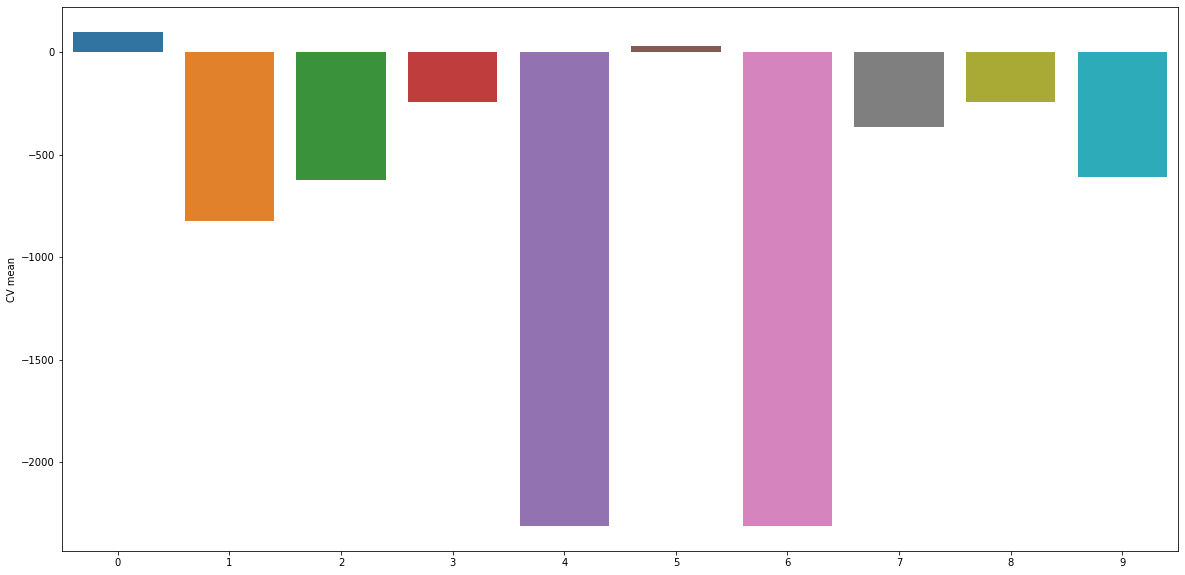

In [78]:
plt.figure(figsize=(20,10))
sns.barplot(y=dcvmrm['CV mean'],x=dcvmrm.index,data=dcvmrm)

<AxesSubplot:ylabel='difference btw r2 and cv'>

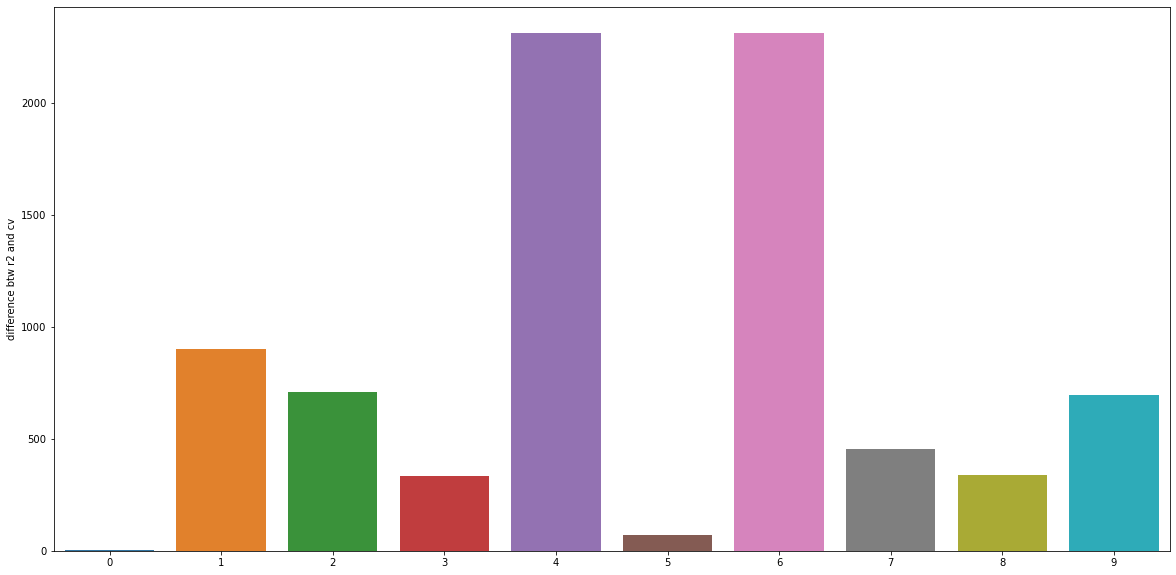

In [79]:
plt.figure(figsize=(20,10))
sns.barplot(y=dcvmrm['difference btw r2 and cv'],x=dcvmrm.index,data=dcvmrm)

# Hyper Parameter Tunning

In [80]:
from sklearn.model_selection import GridSearchCV
parameters={'fit_intercept': [True, False],
 'copy_X': [True, False],
 'n_jobs': [None,1,2,5],
 'positive': [True, False]}
GCV=GridSearchCV(LRR,parameters)
GCV.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, 1, 2, 5], 'positive': [True, False]})

In [81]:
best_parameters = GCV.best_params_
print(best_parameters)
best_result=GCV.best_score_
print(best_result)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}
0.9992498488491373


In [82]:
Final_model=LinearRegression(copy_X= True, fit_intercept= True, n_jobs= None, positive= True )
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print("R2 Score: ", r2_score(y_test,pred))
print('Mean absolute error: ',mean_absolute_error(y_test, pred))
print('Mean squared error: ',mean_squared_error(y_test, pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test, pred)))

R2 Score:  0.9997598170463096
Mean absolute error:  0.013922727060371681
Mean squared error:  0.0003048300488211546
Root Mean squared error:  0.017459382830476988


# Saving the Model

In [83]:
import pickle
filename='WorldHappiness.pkl'
pickle.dump(Final_model,open(filename,'wb'))

In [84]:
loaded_model=pickle.load(open('WorldHappiness.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

99.97598170463095


In [85]:
prediction=loaded_model.predict(x_test)
a=np.array(y_test)
df4=pd.DataFrame()
df4["Predicted"]=prediction
df4["Original"] = a
df4

,Predicted,Original
0,7.427678,7.427
1,5.800216,5.770
2,6.876301,6.867
3,4.540867,4.518
4,6.475143,6.477
5,6.400596,6.411
6,4.907666,4.885
7,4.798233,4.786
8,4.204062,4.194
9,6.461902,6.455
